In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import keras.datasets.mnist as mnist
(train_image, train_label), (test_image, test_label) = mnist.load_data() 

In [3]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 多层网络搭建

In [4]:
model = keras.Sequential()

In [5]:
from keras import layers

In [6]:
model.add( layers.Flatten() )  # (60000, 28, 28) —— (60000, 784)
model.add( layers.Dense(64, activation = 'relu') )
model.add( layers.Dense(64, activation = 'relu') )
model.add( layers.Dense(64, activation = 'relu') )
model.add( layers.Dense(64, activation = 'relu') )
model.add( layers.Dense(10, activation = 'softmax') )

In [7]:
model.compile( optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['acc']
)

In [8]:
history = model.fit( train_image, train_label, epochs = 30, batch_size = 512, validation_data=(test_image, test_label) )


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 13us/step - loss: 2.2024 - acc: 0.6820 - val_loss: 0.5771 - val_acc: 0.8429
Epoch 2/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.4567 - acc: 0.8703 - val_loss: 0.3828 - val_acc: 0.8896
Epoch 3/30
60000/60000 [==============================] - 1s 11us/step - loss: 0.3153 - acc: 0.9085 - val_loss: 0.3018 - val_acc: 0.9142
Epoch 4/30
60000/60000 [==============================] - 1s 10us/step - loss: 0.2454 - acc: 0.9273 - val_loss: 0.2572 - val_acc: 0.9283
Epoch 5/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.2010 - acc: 0.9406 - val_loss: 0.2384 - val_acc: 0.9344
Epoch 6/30
60000/60000 [==============================] - 1s 10us/step - loss: 0.1743 - acc: 0.9472 - val_loss: 0.2215 - val_acc: 0.9390
Epoch 7/30
60000/60000 [==============================] - 1s 10us/step - loss: 0.1520 - acc: 0.9538 - val_loss: 0.2079 - val_acc

In [9]:
model.evaluate(train_image, train_label)

60000/60000 [==============================] - 1s 19us/step


[0.024327570070605604, 0.9921000003814697]

In [10]:
model.evaluate(test_image, test_label)

10000/10000 [==============================] - 0s 21us/step


[0.21338858917557435, 0.9599000215530396]

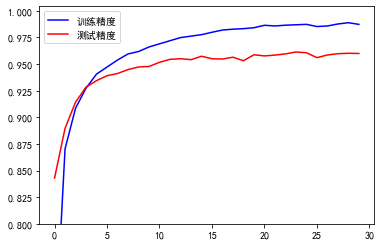

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False    # 步骤二（解决坐标轴负数的负号显示问题）
# 训练精度与测试精度的对比图：
plt.plot( history.epoch, history.history.get('acc'), c = 'b', label = '训练精度' )
plt.plot( history.epoch, history.history.get('val_acc'), c = 'r', label = '测试精度' )
plt.ylim( ymin=0.8 )
plt.legend()

# 使用dropout优化

In [18]:
model1 = keras.Sequential()

model1.add( layers.Flatten() )  # (60000, 28, 28) —— (60000, 784)
model1.add( layers.Dense(128, activation = 'relu') )
model1.add( layers.Dropout(0.3) )
model1.add( layers.Dense(64, activation = 'relu') )
model1.add( layers.Dropout(0.3) )
model1.add( layers.Dense(64, activation = 'relu') )
model1.add( layers.Dropout(0.3) )
model1.add( layers.Dense(64, activation = 'relu') )
model1.add( layers.Dropout(0.3) )
model1.add( layers.Dense(10, activation = 'softmax') )

In [19]:
model1.compile( optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc']
)

In [25]:
# 用了dropout使得网络的单元数变少，因此要增大epochs
history = model1.fit( train_image, train_label, epochs = 150, batch_size = 512, validation_data=(test_image, test_label) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.6333 - acc: 0.7963 - val_loss: 0.4173 - val_acc: 0.8792
Epoch 2/150
60000/60000 [==============================] - 1s 15us/step - loss: 0.6246 - acc: 0.8014 - val_loss: 0.4540 - val_acc: 0.8440
Epoch 3/150
60000/60000 [==============================] - 1s 15us/step - loss: 0.6234 - acc: 0.7979 - val_loss: 0.4318 - val_acc: 0.8671
Epoch 4/150
60000/60000 [==============================] - 1s 17us/step - loss: 0.6130 - acc: 0.8031 - val_loss: 0.4697 - val_acc: 0.8425
Epoch 5/150
60000/60000 [==============================] - 1s 16us/step - loss: 0.6113 - acc: 0.8026 - val_loss: 0.4085 - val_acc: 0.8750
Epoch 6/150
60000/60000 [==============================] - 1s 18us/step - loss: 0.6101 - acc: 0.8036 - val_loss: 0.4212 - val_acc: 0.8738
Epoch 7/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.6049 - acc: 0.8041 - val_loss: 0.4343 - 

60000/60000 [==============================] - 1s 21us/step - loss: 0.4977 - acc: 0.8490 - val_loss: 0.3348 - val_acc: 0.9185
Epoch 60/150
60000/60000 [==============================] - 1s 22us/step - loss: 0.4951 - acc: 0.8492 - val_loss: 0.3272 - val_acc: 0.9172
Epoch 61/150
60000/60000 [==============================] - 1s 17us/step - loss: 0.5051 - acc: 0.8435 - val_loss: 0.3145 - val_acc: 0.9250
Epoch 62/150
60000/60000 [==============================] - 1s 16us/step - loss: 0.4952 - acc: 0.8499 - val_loss: 0.3256 - val_acc: 0.9168
Epoch 63/150
60000/60000 [==============================] - 1s 16us/step - loss: 0.4903 - acc: 0.8510 - val_loss: 0.3034 - val_acc: 0.9263
Epoch 64/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4891 - acc: 0.8487 - val_loss: 0.3207 - val_acc: 0.9233
Epoch 65/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4929 - acc: 0.8492 - val_loss: 0.3282 - val_acc: 0.9174
Epoch 66/150
60000/60000 [==============

Epoch 118/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4257 - acc: 0.8703 - val_loss: 0.2841 - val_acc: 0.9291
Epoch 119/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4240 - acc: 0.8718 - val_loss: 0.2915 - val_acc: 0.9249
Epoch 120/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4280 - acc: 0.8713 - val_loss: 0.2849 - val_acc: 0.9312
Epoch 121/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4297 - acc: 0.8700 - val_loss: 0.2831 - val_acc: 0.9274
Epoch 122/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4249 - acc: 0.8716 - val_loss: 0.3065 - val_acc: 0.9084
Epoch 123/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4281 - acc: 0.8714 - val_loss: 0.2824 - val_acc: 0.9279
Epoch 124/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4222 - acc: 0.8735 - val_loss: 0.2908 - val_acc: 0.9247
Epoch 125/150
60000/

In [26]:
model1.evaluate(train_image, train_label)

60000/60000 [==============================] - 1s 22us/step


[0.21926665494640668, 0.939383327960968]

In [27]:
model1.evaluate(test_image, test_label)

10000/10000 [==============================] - 0s 25us/step


[0.29205165464282035, 0.9300000071525574]

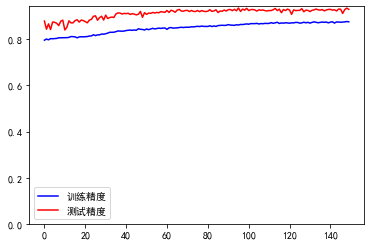

In [28]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False    # 步骤二（解决坐标轴负数的负号显示问题）
# 训练精度与测试精度的对比图：
plt.plot( history.epoch, history.history.get('acc'), c = 'b', label = '训练精度' )
plt.plot( history.epoch, history.history.get('val_acc'), c = 'r', label = '测试精度' )
plt.ylim( ymin=0 )
plt.legend()